# Numerically solve an ODE in SciPy
https://docs.sympy.org/dev/guides/solving/solve-ode.html#numerically-solve-an-ode-in-scipy

 The following is an example from the SymPy docs of how to define a system of differential equations symbolically with SymPy and solve them numerically with SciPy.

In [38]:
from sympy import symbols, lambdify, I
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [5]:
# Create symbols y0, y1, and y2
y = symbols('y:3')
kf, kb = symbols('kf kb')
rf = kf * y[0]**2 * y[1]
rb = kb * y[2]**2
# Derivative of the function y(t); values for the three chemical species
# for input values y, kf, and kb
ydot = [2*(rb - rf), rb - rf, 2*(rf - rb)]
t = symbols('t') # not used in this case
# Convert the SymPy symbolic expression for ydot into a form that
# SciPy can evaluate numerically, f
f = lambdify((t, y, kf, kb), ydot)

In [6]:
k_vals = np.array([0.42, 0.17]) # arbitrary in this case
y0 = [1, 1, 0] # initial condition (initial values)
t_eval = np.linspace(0, 10, 50) # evaluate integral from t = 0-10 for 50 points
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f
solution = scipy.integrate.solve_ivp(f, (0, 10), y0, t_eval=t_eval, args=k_vals)
# Extract the y (concentration) values from SciPy solution result
y = solution.y

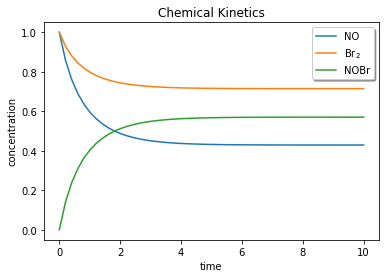

In [7]:
# Plot the result graphically using matplotlib
plt.plot(t_eval, y.T) 
# Add title, legend, and axis labels to the plot
plt.title('Chemical Kinetics') 
plt.legend(['NO', 'Br$_2$', 'NOBr'], shadow=True) 
plt.xlabel('time') 
plt.ylabel('concentration') 
# Finally, display the annotated plot
plt.show()

## Modified for the complex case

In [46]:
# Create symbols g0, g1, and g2 (complex valued functions)
g = symbols('g:3')
kf, kb = symbols('kf kb')
rfg = kf * g[0]**2 * g[1]
rbg = kb * g[2]**2
# Derivative of the complex valued function g(t); values for the three chemical species
# for input values g, kf, and kb
gdot = [2*(rbg - rfg), rbg - rfg, 2*(rfg - rbg)]

In [62]:
# Create symbols gr0, gr1, and gr2 for the real parts of g (real valued functions)
# Create symbols gi0, gi1, and gi2 for the imag parts of g (real valued functions)
gr = symbols('gr:3')
gi = symbols('gi:3')

g_ = tuple(gr[k] + I *gi[k] for k in range(len(g)))
gdot_ = [eq_.subs([(g[k],g_[k]) for k in range(len(g))]).expand() for eq_ in gdot]

gdot_r = [eq_.subs(I,0) for eq_ in gdot_]
gdot_i = [(-I*eq_).expand().subs(I,0) for eq_ in gdot_]
g_ri = gr + gi
gdot_ri = gdot_r + gdot_i

f_ = lambdify((t, g_ri, kf, kb), gdot_ri)

In [68]:
k_vals = np.array([0.42, 0.17]) # arbitrary in this case
g_ri0 = [1, 1, 0, 0, 0, 0] # initial condition (initial values)
t_eval = np.linspace(0, 10, 50) # evaluate integral from t = 0-10 for 50 points
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f
solution = scipy.integrate.solve_ivp(f_, (0, 10), g_ri0, t_eval=t_eval, args=k_vals)
# Extract the y (concentration) values from SciPy solution result
g_ri_sol = solution.y

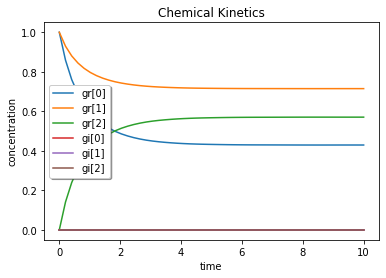

In [69]:
# Plot the result graphically using matplotlib
plt.plot(t_eval, g_ri_sol.T) 
# Add title, legend, and axis labels to the plot
plt.title('Chemical Kinetics') 
plt.legend(['gr[0]', 'gr[1]', 'gr[2]', 'gi[0]', 'gi[1]', 'gi[2]'], shadow=True) 
plt.xlabel('time') 
plt.ylabel('concentration') 
# Finally, display the annotated plot
plt.show()

In [70]:
k_vals = np.array([0.42, 0.17]) # arbitrary in this case
g_ri0 = [1, 1, 0, 1, 0, 1] # initial condition (initial values)
t_eval = np.linspace(0, 10, 50) # evaluate integral from t = 0-10 for 50 points
# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f
solution = scipy.integrate.solve_ivp(f_, (0, 10), g_ri0, t_eval=t_eval, args=k_vals)
# Extract the y (concentration) values from SciPy solution result
g_ri_sol = solution.y

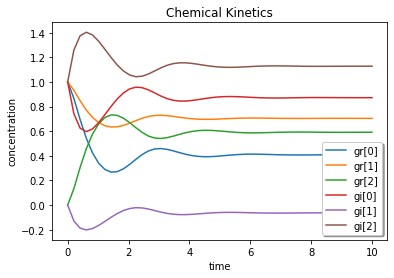

In [71]:
# Plot the result graphically using matplotlib
plt.plot(t_eval, g_ri_sol.T) 
# Add title, legend, and axis labels to the plot
plt.title('Chemical Kinetics') 
plt.legend(['gr[0]', 'gr[1]', 'gr[2]', 'gi[0]', 'gi[1]', 'gi[2]'], shadow=True) 
plt.xlabel('time') 
plt.ylabel('concentration') 
# Finally, display the annotated plot
plt.show()